# Heart Disease Prediction

Data aslinya berasal dari UCI Machine Learning Repository<br>
Silahkan cek disini https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Berikut adalah nama-nama pihak yang menyiapkan dataset ini
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

### Task 1: Import Numpy dan Pandas
Silahkan import package numpy dan pandas

In [1]:
# import here
import numpy as np
import pandas as pd

### Task 2: Import Data
Berdasarkan keterangan di UCI, 
```
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.
```

Data yang akan kita pakai adalah data penyakit jantung dari Cleveland Database.<br>
Kita akan pakai data yang sudah diproses (hanya 14 fitur yang digunakan) sesuai keterangannya.<br>
Silahkan import datanya menggunakan pandas -> `data/preprocessed.cleveland.data`

In [11]:
# import data here
df_hd = pd.read_csv("data/processed-Copy1.cleveland.data")

In [12]:
df_hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [13]:
from jcopml.plot import plot_missing_value

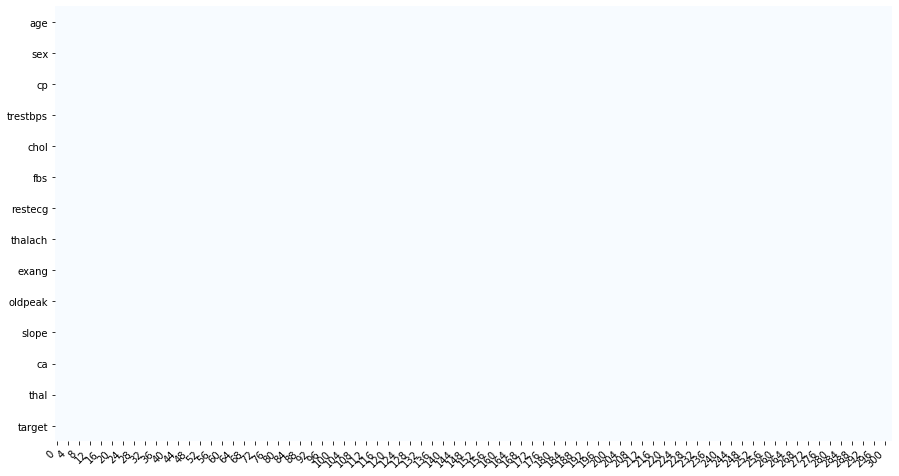

In [14]:
plot_missing_value(df_hd)

### Task 3: Replace ? dengan NaN

<img src="assets/missing_value.png" width=600>

Kalau kita lihat datanya, ternyata missing value diisi menggunakan `?`. Padahal kita biasa menghandle missing value dalam bentuk `NaN`. Jadi kita timpa saja semua yang `?` dengan `NaN` dari numpy -> `np.nan`.

Silahkan pakai `.replace()` dari pandas DataFrame untuk melakukan itu. Jangan lupa di `inplace` ya.

In [15]:
# replace data here
df_hd.replace(to_replace='?', value=np.nan, inplace=True)

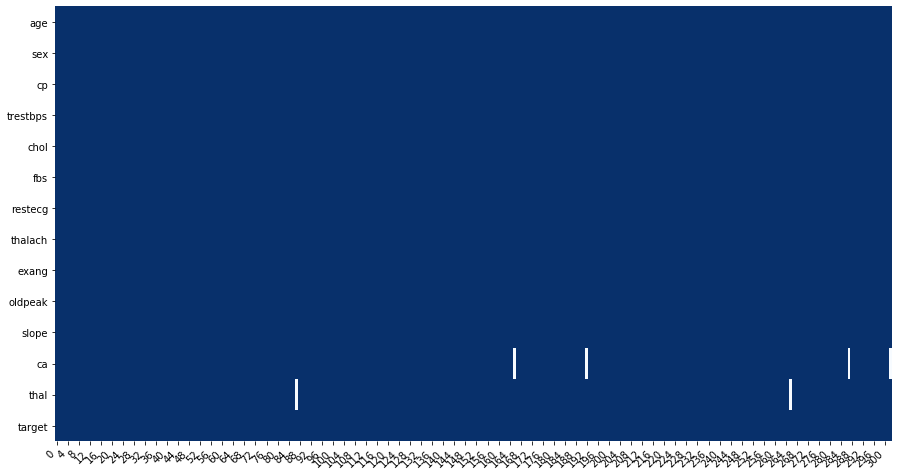

In [8]:
plot_missing_value(df_hd)

### Task 4: Drop column
Silahkan menggunakan intuisi masing-masing mana kolom yang dirasa tidak masuk akal untuk memprediksi penyakit jantung. Walau itu sudah dilakukan oleh peneliti sebelumnya (dari 76 kolom tinggal 14), tapi kita boleh saja memiliki intuisi pribadi bahwa dari 14 itu pun tidak semua dibutuhkan. Kita juga bisa melakukan `plot_missing_value` untuk cek apakah ada fitur yang terlalu banyak bolongnya karena fitur itu sebaiknya tidak dipakai.

Berikut nomenklatur yang saya peroleh dari datanya:
```
age: Umur
sex: jenis kelamin
cp: chest pain. Ada 4 tipe
    1: typical angina
    2: atypical angina
    3: non-anginal pain
    4: asymptomatic
trestbps: Tekanan darah (kondisi resting) [mmHg]
chol: serum cholestoral [mg/dl]
fbs: kadar gula (kondisi berpuasa)
    1 artinya > 120 mg/dl
    0 sebaliknya
restecg: electrocardiographic (kondisi resting)
    0: normal
    1: ada ST-T wave abnormality
    2: ada indikasi left ventricular hypertrophy menurut kriteria Estes
thalach: detak jantung maximum
exang: mengalami chest pain tipe angina ketika olahraga
    1 artinya iya
    0 artinya tidak
oldpeak: mengalami ST depression ketika olahraga dibandingkan saat diam
slope: kemiringan pada peak exercise ST segment -> (coba search ST Segment di google)
    1: naik
    2: datar
    3: turun
ca: banyaknya saluran saluran darah utama (0-3) dilihat dengan flourosopy
thal: 
    3 = normal
    6 = cacat permanen
    7 = cacat reversibel
target:
    0 tidak ada indikasi penyakit jantung
    1,2,3,4: ada indikasi penyakit jantung
```
Note: Translasi saya bisa saja salah karena saya juga tidak terlalu paham dengan istilah kedokteran. Jadi boleh cek langsung informasi aslinya di `data/heart-disease.names`

Ok, silahkan analisa setiap fiturnya dan lakukan `plot_missing_value`. `plot_missing_value` adalah sebuah tools yang disediakan di dalam `jcopml.plot`

In [8]:
# import here

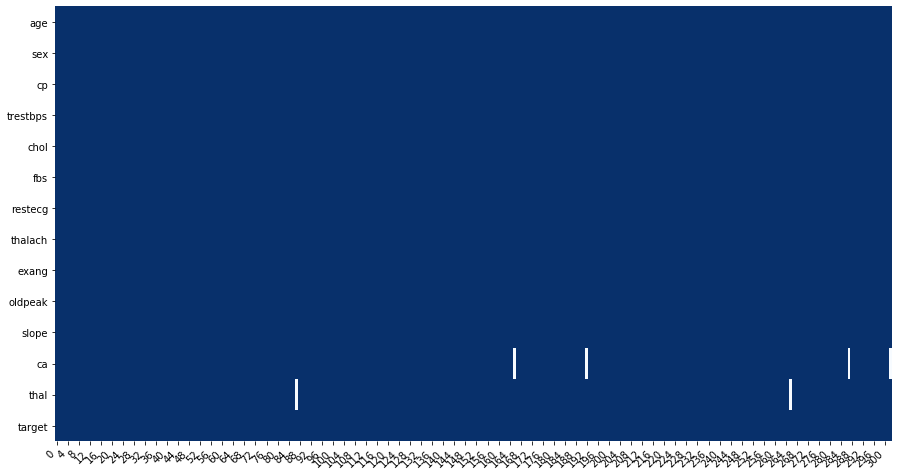

In [16]:
# check missing value
plot_missing_value(df_hd)

### Task 5: Mengubah target

Berdasarkan keterangan di UCI, 
```
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0)
```
kita hanya ingin mendeteksi apakah ada indikasi penyakit jantung atau tidak. Jadi:
- 0 -> `False` (tidak ada indikasi)
- 1, 2, 3, 4 -> `True` (ada indikasi)

Hint, boleh coba pakai `.apply()` atau `.map()`

In [17]:
# ubah target menjadi biner
df_hd.target = df_hd.target.map({0: False,
                                1: True,
                                2: True,
                                3: True})
df_hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,False
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,True
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,True
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,False
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,False


In [67]:
# for i in range(len(df_hd.target)):
#     if df_hd.target[i] == False:
#         print("not empty")
#     elif df_hd.target[i] == True:
#         print("not empty")
#     else:
#         print(df_hd.target[i])
#         print(df_hd.target[i].index("nan"))

In [68]:
# df_hd[["target"]][0:40]

### Task 6: Dataset Splitting

Split data menggunakan `train_test_split` dari `sklearn.model_selection`.
Pastikan:
- memakai stratified shuffle split<br>
ya karena ini klasifikasi. Kita mau soal ujiannya serepresentatif mungkin.
- test size yang sesuai<br>
Hati-hati, pastikan soal ujian tidak terlalu sedikit agar nilainya pun tidak sensitif

In [18]:
# import here
from sklearn.model_selection import train_test_split

In [30]:
df_hd.target.isna().sum()

13

In [19]:
# split data here
X = df_hd.drop(columns='target') #X is all columns except target
y = df_hd.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

ValueError: Input contains NaN

### Task 7: Persiapkan preprocessor

Steps:
- siapkan numerical dan categorical pipeline
- gabungkan keduanya menjadi preprocessor menggunakan ColumnTransformer
- pilah kolom yang sesuai untuk numerical dan categorical pipeline
- **Hati-hati, yang angka bukan berarti numerik, tapi bisa kategorikal juga**

Jangan ragu untuk lihat kembali notebook sebelumnya ya (`4 - KNN & Scikit-learn`/`Part 3 - Scikit-learn Pipeline and Workflow`)<br>

In [15]:
# import here
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [16]:
# numerical and categorical pipeline
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')),
    ("scaler", MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder())
])

```
age: Umur
sex: jenis kelamin
cp: chest pain. Ada 4 tipe
    1: typical angina
    2: atypical angina
    3: non-anginal pain
    4: asymptomatic
trestbps: Tekanan darah (kondisi resting) [mmHg]
chol: serum cholestoral [mg/dl]
fbs: kadar gula (kondisi berpuasa)
    1 artinya > 120 mg/dl
    0 sebaliknya
restecg: electrocardiographic (kondisi resting)
    0: normal
    1: ada ST-T wave abnormality
    2: ada indikasi left ventricular hypertrophy menurut kriteria Estes
thalach: detak jantung maximum
exang: mengalami chest pain tipe angina ketika olahraga
    1 artinya iya
    0 artinya tidak
oldpeak: mengalami ST depression ketika olahraga dibandingkan saat diam
slope: kemiringan pada peak exercise ST segment -> (coba search ST Segment di google)
    1: naik
    2: datar
    3: turun
ca: banyaknya saluran saluran darah utama (0-3) dilihat dengan flourosopy
thal: 
    3 = normal
    6 = cacat permanen
    7 = cacat reversibel
target:
    0 tidak ada indikasi penyakit jantung
    1,2,3,4: ada indikasi penyakit jantung
```

In [19]:
df_hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,False
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,True
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,True
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,False
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,False


In [17]:
# import Column Transformer
from sklearn.compose import ColumnTransformer

In [ ]:
# Column Transformer
preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, ["age", "trestbps", "chol", "thalac", "oldpeak", "ca"]),
    ("categoric", categorical_pipeline, ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"])
])

### Task 8: Buat Training pipeline

training pipeline = preprocessor + algo dibungkus pakai pipeline. Gampang kan ya?<br>
Untuk sekarang algonya tetap KNN ya. <br>
Haiyo, `KNeighborsClassifier` atau `KNeighborsRegressor` nih? Jangan ketukar ya.

In [ ]:
# import algo here

In [ ]:
# buat training pipeline

### Task 9: Training, Cross Validate, Tuning, dan Evaluasi

Pakai saja `GridSearchCV` dari `sklearn.model_selection`. Jangan lupa buat parameter grid nya beserta tentukan mau berapa fold CV nya.

Silahkan pakai ini untuk evaluasi
```python
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))
```

In [ ]:
# import parameter search

In [ ]:
# define parameter grid, training, tuning, dan evaluasi

### Task 10: Save Model

Bisa pickle sendiri secara manual (cek materi bonus) atau pakai `save_model` yang disediakan di `jcopml.utils`<br>
Save model kita dengan nama `knn_heart.pkl`

In [ ]:
# import here

In [ ]:
# save model here

### Final Task

Coba review kembali pertanyaan-pertanyaan berikut
- Kenapa kita perlu dataset splitting?
- Apa tujuan kita melakukan stratified shuffle split untuk klasifikasi?
- Kenapa kita perlu kita menggunakan k-fold cross validation?
- Apa itu Data Leakage? Kapan biasanya orang kelupaan dan terjadi leakage?
- Apa itu Train-Val-Test split?